Context

Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?
Content

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

    Time period: Donated to UCI ML 27 April 1987

Inspiration

    What types of machine learning models perform best on this dataset?

    Which features are most indicative of a poisonous mushroom?

Acknowledgements

This dataset was originally donated to the UCI Machine Learning repository. You can learn more about past research using the data here. 

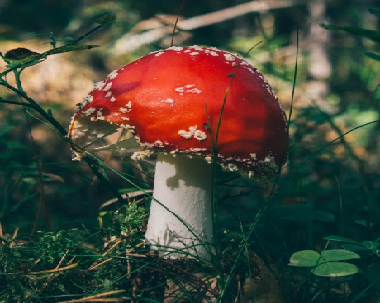

<center><h2>Mushroom Classification</h2></center>


<center><h3>Safe to eat or deadly poison?</h3></center>

Attribute Information: (classes: edible=e, poisonous=p)


+ `cap-shape`: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
+ `cap-surface`: fibrous=f,grooves=g,scaly=y,smooth=s
+ `cap-color`: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
+ `bruises`: bruises=t,no=f
+ `odor`: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
+ `gill-attachment`: attached=a,descending=d,free=f,notched=n
+ `gill-spacing`: close=c,crowded=w,distant=d
+ `gill-size`: broad=b,narrow=n
+ `gill-color`: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
+ `stalk-shape`: enlarging=e,tapering=t
+ `stalk-root`: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
+ `stalk-surface-above-ring`: fibrous=f,scaly=y,silky=k,smooth=s
+ `stalk-surface-below-ring`: fibrous=f,scaly=y,silky=k,smooth=s
+ `stalk-color-above-ring`: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
+ `stalk-color-below-ring`: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
+ `veil-type`: partial=p,universal=u
+ `veil-color`: brown=n,orange=o,white=w,yellow=y
+ `ring-number`: none=n,one=o,two=t
+ `ring-type`: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
+ `spore-print-color`: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
+ `population`: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
+ `habitat`: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, math as mth, seaborn as sns, datetime as dt
from scipy import stats as st
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

In [ ]:
!pip install catboost

### Шаг 1. Загрузка данных

In [ ]:
path = !pwd

In [ ]:
df = pd.read_csv(path[0]+'/mushrooms.csv')

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
X_col = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [ ]:
Y_col = ['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df[X_col], df[Y_col], test_size=0.33, random_state=42)

In [ ]:
cat_features=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [ ]:
model = CatBoostClassifier(cat_features=cat_features, task_type='GPU')

In [ ]:
model.fit(X_train, y_train, cat_features=cat_features, verbose = 10)

Learning rate set to 0.030712
0:	learn: 0.6001105	total: 97.8ms	remaining: 1m 37s
10:	learn: 0.1620910	total: 735ms	remaining: 1m 6s
20:	learn: 0.0629935	total: 1.26s	remaining: 58.8s
30:	learn: 0.0333220	total: 1.76s	remaining: 55s
40:	learn: 0.0189723	total: 2.28s	remaining: 53.3s
50:	learn: 0.0131722	total: 2.81s	remaining: 52.3s
60:	learn: 0.0113721	total: 3.33s	remaining: 51.2s
70:	learn: 0.0097961	total: 3.83s	remaining: 50.1s
80:	learn: 0.0090976	total: 4.33s	remaining: 49.1s
90:	learn: 0.0082742	total: 4.82s	remaining: 48.2s
100:	learn: 0.0075048	total: 5.3s	remaining: 47.2s
110:	learn: 0.0071570	total: 5.8s	remaining: 46.4s
120:	learn: 0.0064728	total: 6.27s	remaining: 45.5s
130:	learn: 0.0057906	total: 6.74s	remaining: 44.7s
140:	learn: 0.0054695	total: 7.25s	remaining: 44.2s
150:	learn: 0.0051468	total: 7.75s	remaining: 43.6s
160:	learn: 0.0047410	total: 8.27s	remaining: 43.1s
170:	learn: 0.0044932	total: 8.73s	remaining: 42.3s
180:	learn: 0.0042471	total: 9.25s	remaining: 4

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
predictions = model.predict(X_test)

In [ ]:
classification_metrics=pd.DataFrame({'Metrics':['Accuracy:', 'Precision:','Recall:'],
              'Value':['{:.2f}'.format(
                  accuracy_score(y_test, predictions)),
                       '{:.2f}'.format(precision_score(y_test, predictions,average='binary', pos_label= 'p')),
                       '{:.2f}'.format(recall_score(y_test, predictions,
                                                    average='binary', pos_label= 'p'))]})

classification_metrics

,Metrics,Value
0,Accuracy:,1.00
1,Precision:,1.00
2,Recall:,1.00


In [ ]:
y_test['predicted']=predictions

In [ ]:
len(predictions)

2681

In [ ]:
y_test[y_test['class']==y_test['predicted']]

,class,predicted
1971,e,e
6654,p,p
5606,p,p
3332,e,e
6988,p,p
...,...,...
6217,p,p
7050,e,e
2957,e,e
5777,e,e


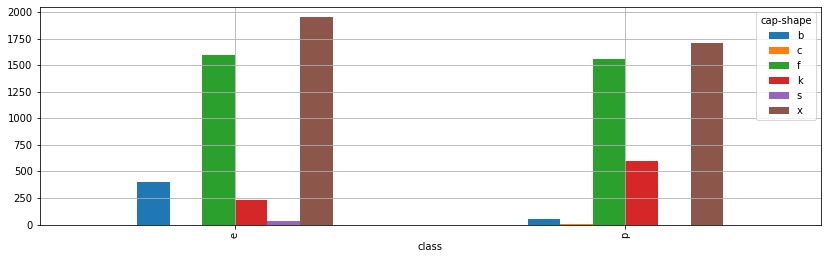

In [ ]:
pd.crosstab(df['class'],df['cap-shape']).plot(kind='bar', figsize=(14,4), grid=True)